<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [33]:
!pip install pandas
!pip install matplotlib

### Step 1: Import Required Libraries


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [35]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head(10))


   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2                     I am a developer by profession   
2           3                     I am a developer by profession   
3           4                              I am learning to code   
4           5                     I am a developer by profession   
5           6                        I code primarily as a hobby   
6           7  I am not primarily a developer, but I write co...   
7           8                              I am learning to code   
8           9                        I code primarily as a hobby   
9          10                     I am a developer by profession   

                  Age                                         Employment  \
0  Under 18 years old                                Employed, full-time   
1     35-44 years old                                Employed, full-time   
2     45-54 years old  

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [36]:
## Write your code here
print ('There Are,', df.duplicated().sum(), 'duplicated rows.')

There Are, 20 duplicated rows.


In [37]:
duplicate_rows = df[df.duplicated(keep=False)] # Keep all duplicates
first_few_duplicates = duplicate_rows.head()

print(first_few_duplicates)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [38]:
## Write your code here
df.drop_duplicates(inplace=True)
df.shape

(65437, 114)

In [39]:
print ('There are now', df.duplicated().sum(), 'duplicated rows.')

There are now 0 duplicated rows.


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [40]:
## Write your code here
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df))*100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})

print ("Missing values per column:\n")
print (missing_summary[missing_summary['Missing Count'] >0])

if 'EdLevel' in df.columns:
    if df['EdLevel'].dropna().empty:
        most_frequent = df['EdLevel'].mode().iloc[0]
    df['EdLevel'].fillna(most_frequent, inplace=True)
    print (f"\nFilled missing 'EdLevel' values with: {most_frequent}")
else:
    print ("\nColumn 'EdLevel' not found in dataset.")

Missing values per column:

                     Missing Count  Missing %
RemoteWork                   10631  16.246160
CodingActivities             10971  16.765744
EdLevel                       4653   7.110656
LearnCode                     4949   7.563000
LearnCodeOnline              16200  24.756636
...                            ...        ...
JobSatPoints_11              35992  55.002522
SurveyLength                  9255  14.143375
SurveyEase                    9199  14.057796
ConvertedCompYearly          42002  64.186928
JobSat                       36311  55.490013

[109 rows x 2 columns]

Filled missing 'EdLevel' values with: Bachelor’s degree (B.A., B.S., B.Eng., etc.)


/tmp/ipykernel_4525/1736003140.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna(most_frequent, inplace=True)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [41]:
## Write your code here
if 'ConvertedCompYearly' in df.columns:
    missing_count =df['ConvertedCompYearly'].isnull().sum()
    total = len(df)
    missing_percent = (missing_count / total) * 100

print (f"Missing values in 'ConvertedCompYearly': {missing_count} ({missing_percent:.2f}%)")

df_cleaned =df.dropna(subset=['ConvertedCompYearly'])

print ("\nDescriptive statistics for ConvertedCompYearly (after cleaning):")
print (df_cleaned['ConvertedCompYearly'].describe())

Missing values in 'ConvertedCompYearly': 42002 (64.19%)

Descriptive statistics for ConvertedCompYearly (after cleaning):
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


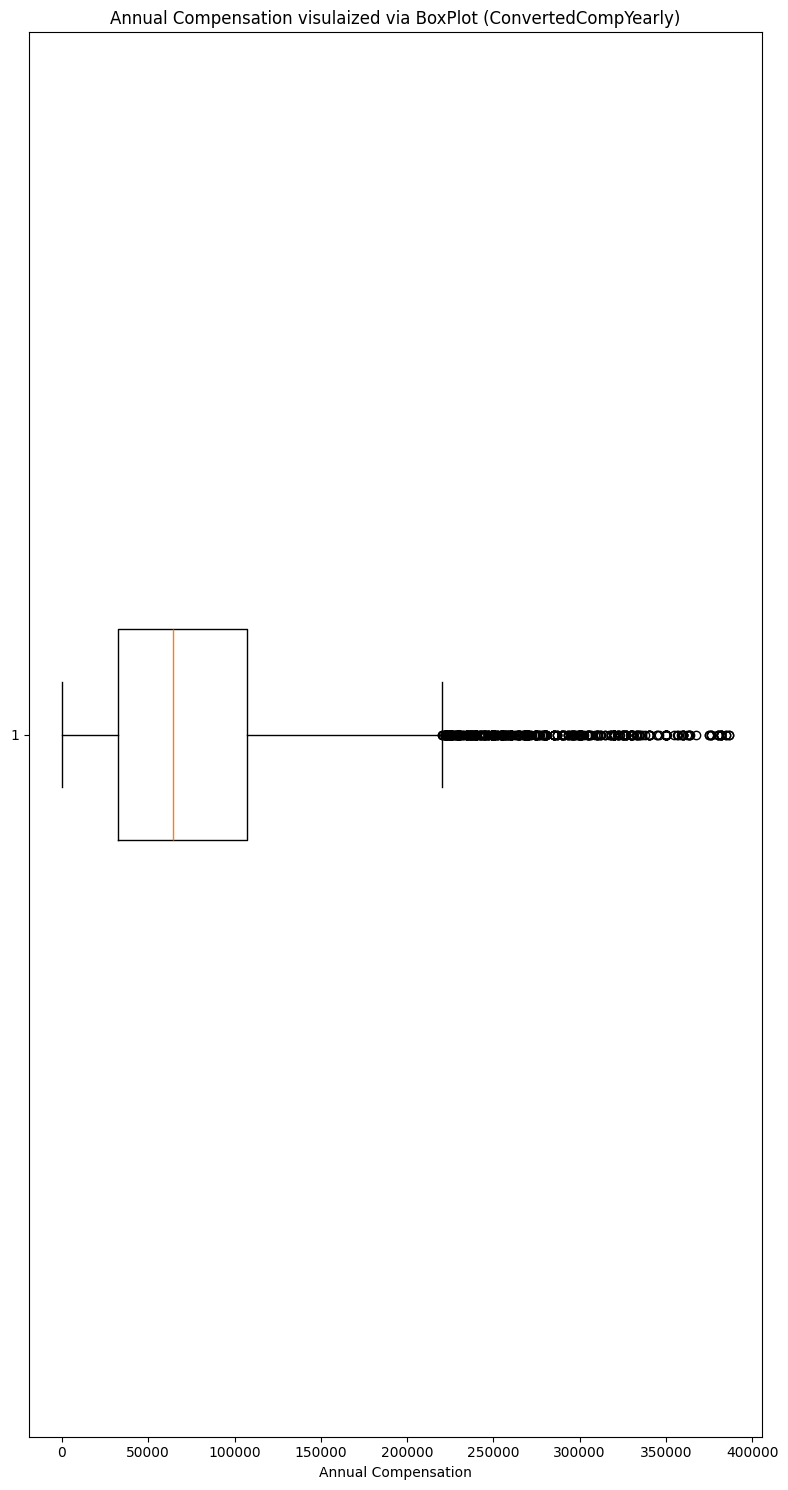

In [48]:
## Write your code here

df_cleaned = df.dropna(subset=['ConvertedCompYearly'])
cap = df_cleaned['ConvertedCompYearly'].quantile(0.99)
df_trimmed = df_cleaned[df_cleaned['ConvertedCompYearly'] <=cap]


plt.figure(figsize=(10,6))
plt.hist(df_trimmed['ConvertedCompYearly'], bins=40, color="pink", edgecolor='purple')
plt.title('Annual 

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
